In [1]:
from base import *
import pandas as pd

## Attente entre achat et réception

In [7]:
dates = orders.selectExpr("order_purchase_timestamp as Achat", "order_approved_at as PaiementConfirme","order_delivered_carrier_date as LivraisonPoste", "order_estimated_delivery_date as LivraisonEstime", "order_delivered_customer_date as Reception").dropna()

"""
Reception - Achat = Délai global
LivraisonPoste - PaiementConfirme = Notre reactivité
LivraisonEstime - Reception = Précision estimation
LivraisonPoste - Reception = Compétence livreur
"""

dates=dates.withColumn("Délai global (j)", abs((unix_timestamp(dates['Reception']) - 
                       unix_timestamp(dates['Achat']))/60/60/24))
dates=dates.withColumn("Réactivité vendeur (h)", abs((unix_timestamp(dates['LivraisonPoste']) - 
                       unix_timestamp(dates['PaiementConfirme']))/60/60))
dates=dates.withColumn("Précision estimation (j)", abs((unix_timestamp(dates['LivraisonEstime']) - 
                       unix_timestamp(dates['Reception']))/60/60/24))
dates=dates.withColumn("Réactivité livreur (j)", abs((unix_timestamp(dates['Reception']) - 
                       unix_timestamp(dates['LivraisonPoste']))/60/60/24))
dates=dates.select("Délai global (j)","Réactivité vendeur (h)","Précision estimation (j)","Réactivité livreur (j)","Achat")
dates.show()

+------------------+----------------------+------------------------+----------------------+-------------------+
|  Délai global (j)|Réactivité vendeur (h)|Précision estimation (j)|Réactivité livreur (j)|              Achat|
+------------------+----------------------+------------------------+----------------------+-------------------+
| 8.436574074074073|    56.795833333333334|       7.107488425925926|     6.062650462962964|2017-10-02 10:56:33|
|13.782037037037037|    11.109166666666665|       5.355729166666666|    12.039409722222222|2018-07-24 20:41:37|
| 9.394212962962962|     4.910277777777778|      17.245497685185185|     9.178113425925927|2018-08-08 08:38:49|
|          13.20875|                  89.9|      12.980069444444444|     9.450497685185185|2017-11-18 19:28:06|
|2.8738773148148145|     21.43472222222222|       9.238171296296297|     1.937824074074074|2018-02-13 21:18:39|
| 16.54224537037037|               40.7975|      5.5431134259259265|    14.833229166666667|2017-07-09 21

## Utilisation des délais par rapport à la satisfaction

In [9]:
#Evolution avec le temps
pandate = dates.toPandas()

In [17]:
pandate['Achat'] = pd.to_datetime(pandate['Achat'])
pandate.index = pandate['Achat']
del pandate['Achat']


KeyError: 'Achat'

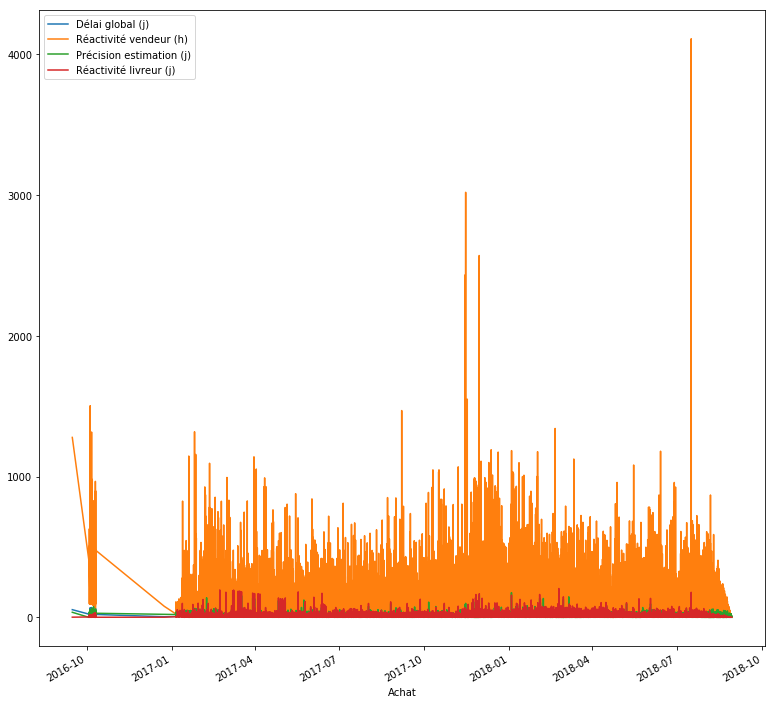

In [20]:
# A faire sur Tableau
pandate.plot(figsize=(13,13))

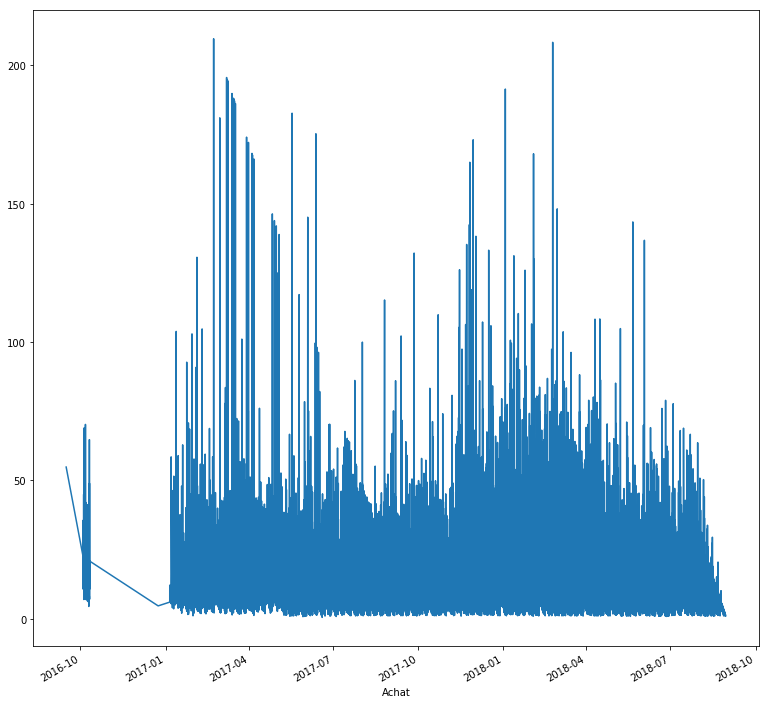

In [24]:

delaiGlobal = pandate["Délai global (j)"]
delaiGlobal.plot(figsize=(13,13))